## Вторая практика: построение диаграммы Хассе для делителей числа

Сначала рассматриваем ручной вариант построения диаграммы Хассе для числа 24

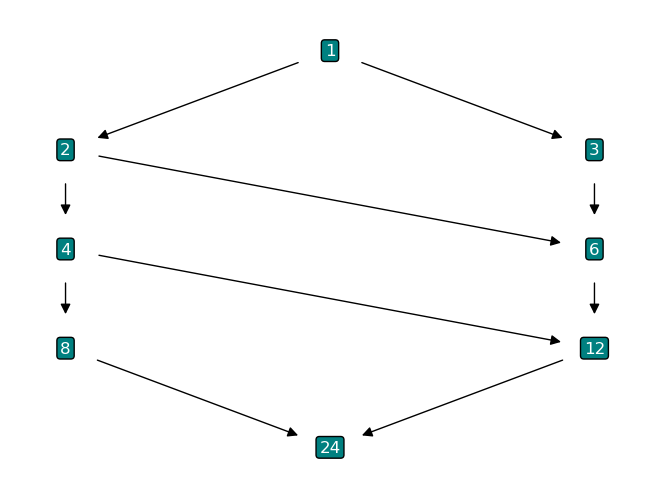

In [1]:
import numpy as np
from hassediagram import plot_hasse

data = (np.array([
    #1, 2, 3, 4, 6, 8,12,24
    [0, 1, 1, 0, 0, 0, 0, 0], # 1
    [0, 0, 0, 1, 1, 0, 0, 0], # 2
    [0, 0, 0, 0, 1, 0, 0, 0], # 3
    [0, 0, 0, 0, 0, 1, 1, 0], # 4
    [0, 0, 0, 0, 0, 0, 1, 0], # 6
    [0, 0, 0, 0, 0, 0, 0, 1], # 8
    [0, 0, 0, 0, 0, 0, 0, 1], # 12
    [0, 0, 0, 0, 0, 0, 0, 0], # 24

]))
labels = ["1", "2", "3", "4", "6", "8", "12", "24"]
plot_hasse(data, labels=labels)

Затем автоматизированный вариант - готовая функция plot_graph, принимающая любое натуральное число n и строящая диаграмму Хасса для него (ПРИМЕР ИСПОЛЬЗОВАНИЯ НИЖЕ)

In [2]:
import numpy as np
from hassediagram import plot_hasse

def plot_graph(n):
    divisors = {} # number: [divisors]
    divisors_to_draw = {} # number: [divisors to draw]

    # находим делители числа n
    for num in range(1, n + 1):
        if n % num == 0: # num - делитель
            divisors[num] = [] # делители num
            nodes_to_skip = set() # вершины, с которыми у числа num нет связи

            # находим делители num среди уже найденных делителей (остальные не подойдут)
            for seen_divisor in divisors:
                if num % seen_divisor == 0 and num != seen_divisor: # само число нам не подходит
                    divisors[num].append(seen_divisor)
                    for node in divisors[seen_divisor]:
                        # node покрыт seen_divisor, поэтому он не подходит
                        nodes_to_skip.add(node)
            
            # находим те вершины, которые связаны с num
            nodes_to_draw = []
            for node in divisors[num]:
                if node not in nodes_to_skip:
                    nodes_to_draw.append(node)
            divisors_to_draw[num] = nodes_to_draw
    
    # матрица смежности, размер (кол-во делителей x кол-во делителей)
    adjacency_matrix = [[0 for _ in range(len(divisors))] for _ in range(len(divisors))]
    
    # заполняем словарь, позволяющий перевести делители в индекс в матрице
    index_map = {} # divisor: index
    for idx, div in enumerate(divisors_to_draw):
        index_map[div] = idx

    labels = [] # создаем подписи для вершин
    for num, divs in divisors_to_draw.items():
        labels.append(num)
        # добавляем связь (div -> num) для каждого div в divs
        for div in divs:
            adjacency_matrix[index_map[div]][index_map[num]] = 1

    adjacency_matrix = np.array(adjacency_matrix)
    plot_hasse(adjacency_matrix, labels=labels)    

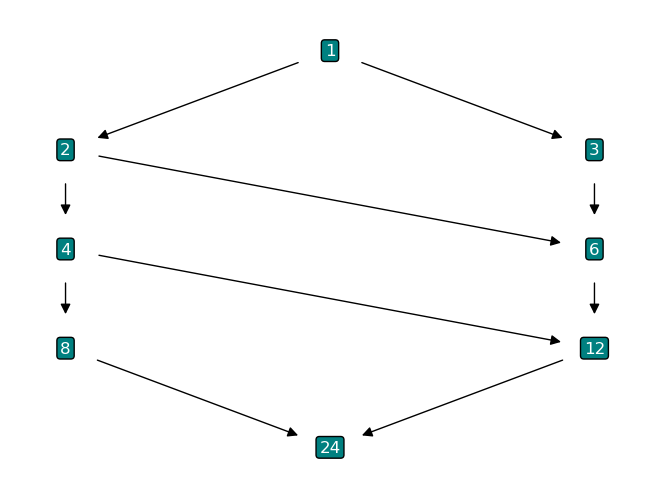

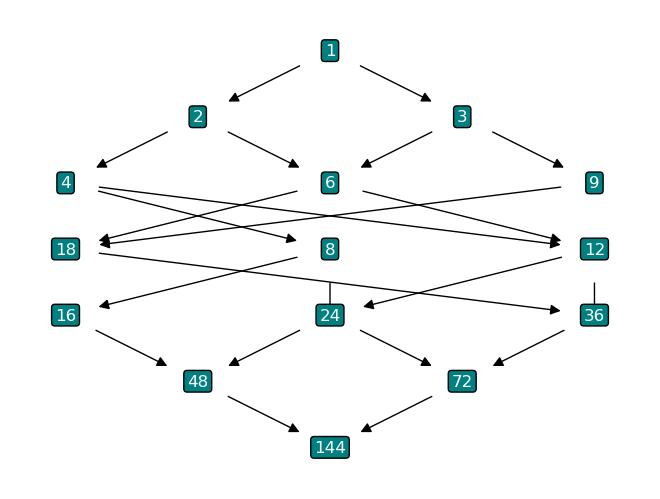

In [3]:
plot_graph(24)
plot_graph(144)